# Exploratory Data Analysis

Chapter 3

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

import utils
from utils import decorate
from distribution import Pmf, Cdf

## Loading and validation


In [123]:
url17 = 'https://www.cdc.gov/brfss/annual_data/2017/llcp_varlayout_17_onecolumn.html'
url16 = 'https://www.cdc.gov/brfss/annual_data/2016/LLCP_VarLayout_16_OneColumn.html'

filename16 = 'LLCP2016ASC.zip'
filename17 = 'LLCP2017ASC.zip'

tables = pd.read_html(url16)

In [124]:
layout = tables[1]
layout.index = layout['Variable Name']
layout

,Starting Column,Variable Name,Field Length
Variable Name,,,
_STATE,1,_STATE,2
FMONTH,17,FMONTH,2
IDATE,19,IDATE,8
IMONTH,19,IMONTH,2
IDAY,21,IDAY,2
IYEAR,23,IYEAR,4
DISPCODE,32,DISPCODE,4
SEQNO,36,SEQNO,10
_PSU,36,_PSU,10


In [125]:
names = [ 'SEX', 'HTM4', 'WTKG3', 'INCOME2', '_LLCPWT' ]

In [126]:
colspecs = []
for name in names:
    start, _, length = layout.loc[name]
    colspecs.append((start-1, start+length-1))
    
colspecs

[(119, 120), (1983, 1986), (1986, 1991), (174, 176), (1746, 1756)]

In [127]:
names.append('AGE')
colspecs.append((121,122))

In [128]:
brfss = pd.read_fwf(filename16,
                    colspecs=colspecs, 
                    names=names,
                    compression='zip',
                    nrows=None)

brfss.head()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,AGE
0,1,173.0,6123.0,5.0,767.844566,NaN
1,2,160.0,6940.0,7.0,329.659884,NaN
2,2,165.0,5443.0,7.0,290.749306,NaN
3,1,185.0,9979.0,7.0,211.039206,NaN
4,1,168.0,5670.0,77.0,1582.539830,NaN


In [7]:
brfss.shape

(450016, 6)

In [8]:
brfss['SEX'].value_counts().sort_index()

1    198725
2    251007
9       284
Name: SEX, dtype: int64

In [9]:
brfss['SEX'].replace([9], np.nan, inplace=True)

In [10]:
brfss['INCOME2'].value_counts().sort_index()

1.0      18346
2.0      19334
3.0      27735
4.0      34222
5.0      39751
6.0      53148
7.0      59632
8.0     122763
77.0     33328
99.0     38426
Name: INCOME2, dtype: int64

In [11]:
brfss['INCOME2'].replace([77, 99], np.nan, inplace=True)

In [12]:
brfss['WTKG3'] /= 100
brfss['WTKG3'].describe()

count    420145.000000
mean         81.586719
std          20.701024
min          22.680000
25%          67.590000
50%          79.380000
75%          91.630000
max         275.000000
Name: WTKG3, dtype: float64

In [13]:
weight = brfss['WTKG3']
weight.nsmallest(10)

202748    22.68
218895    22.68
246312    22.68
420587    22.68
446610    22.68
385527    23.13
99318     24.04
299845    24.04
173461    24.49
112834    24.95
Name: WTKG3, dtype: float64

In [14]:
weight.nlargest(10)

78560     275.00
155453    273.97
35729     272.61
70531     272.16
111021    272.16
220908    272.16
221451    272.16
229302    272.16
279941    272.16
305983    272.16
Name: WTKG3, dtype: float64

In [15]:
height = brfss['HTM4']
height.nsmallest(10)

18101     91.0
28286     91.0
126276    91.0
270173    91.0
351342    91.0
363762    91.0
368934    91.0
385478    91.0
384489    94.0
269650    97.0
Name: HTM4, dtype: float64

In [16]:
height.nlargest(10)

134893    236.0
230559    231.0
113037    226.0
148519    226.0
265919    226.0
294762    226.0
372189    226.0
38054     224.0
51866     224.0
271351    224.0
Name: HTM4, dtype: float64

In [17]:
brfss['HTM4'].describe()

count    433572.000000
mean        169.821863
std          10.614508
min          91.000000
25%         163.000000
50%         170.000000
75%         178.000000
max         236.000000
Name: HTM4, dtype: float64

In [18]:
brfss['_LLCPWT'].describe()

count    450016.000000
mean        568.098034
std        1119.545360
min           0.131624
25%          91.499675
50%         237.083009
75%         592.876546
max       45053.592700
Name: _LLCPWT, dtype: float64

In [19]:
brfss['_AGEG5YR'].describe()

count    450016.000000
mean          7.747962
std           3.557474
min           1.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          14.000000
Name: _AGEG5YR, dtype: float64

In [20]:
brfss['_AGEG5YR'].replace([14], np.nan, inplace=True)

In [21]:
lower = np.arange(15, 85, 5)
upper = lower + 4

In [22]:
lower[1]= 18
lower = pd.Series(lower, index=range(len(lower)))
lower

0     15
1     18
2     25
3     30
4     35
5     40
6     45
7     50
8     55
9     60
10    65
11    70
12    75
13    80
dtype: int64

In [23]:
upper[-1] = 99
upper = pd.Series(upper, index=range(len(upper)))
upper

0     19
1     24
2     29
3     34
4     39
5     44
6     49
7     54
8     59
9     64
10    69
11    74
12    79
13    99
dtype: int64

In [24]:
age_code = brfss['_AGEG5YR']
age_code.describe()

count    443915.000000
mean          7.662037
std           3.504991
min           1.000000
25%           5.000000
50%           8.000000
75%          10.000000
max          13.000000
Name: _AGEG5YR, dtype: float64

In [25]:
np.random.seed(17)
sample = utils.resample_rows_weighted(brfss, '_LLCPWT')[:100000]

In [26]:
lower = np.arange(15, 85, 5)
upper = lower + 4

In [27]:
lower[1]= 18
lower = pd.Series(lower, index=range(len(lower)))
lower

0     15
1     18
2     25
3     30
4     35
5     40
6     45
7     50
8     55
9     60
10    65
11    70
12    75
13    80
dtype: int64

In [28]:
upper[-1] = 99
upper = pd.Series(upper, index=range(len(upper)))
upper

0     19
1     24
2     29
3     34
4     39
5     44
6     49
7     54
8     59
9     64
10    69
11    74
12    79
13    99
dtype: int64

In [29]:
age_code = sample['_AGEG5YR']

In [30]:
lower = lower[age_code]
lower.describe()

count    98794.000000
mean        45.262091
std         18.377265
min         18.000000
25%         30.000000
50%         45.000000
75%         60.000000
max         80.000000
dtype: float64

In [31]:
upper = upper[age_code]
upper.describe()

count    98794.000000
mean        50.179373
std         19.481271
min         24.000000
25%         34.000000
50%         49.000000
75%         64.000000
max         99.000000
dtype: float64

In [32]:
def randint(lower, upper):
    for low, high in zip(lower, upper+1):
        try:
            yield np.random.randint(low, high)
        except ValueError:
            yield np.nan

In [33]:
sample['AGE'] = list(randint(lower, upper))

In [34]:
sample['AGE'].describe()

count    98794.000000
mean        47.726249
std         18.976257
min         18.000000
25%         32.000000
50%         47.000000
75%         62.000000
max         99.000000
Name: AGE, dtype: float64

In [35]:
sample.head(10)

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,46.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,83.0
57312,2.0,163.0,72.57,8.0,390.248599,5.0,43.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,30.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,30.0
305424,2.0,160.0,72.57,NaN,509.733354,13.0,81.0
302232,1.0,NaN,NaN,NaN,1657.213620,8.0,57.0
283720,2.0,152.0,108.86,8.0,3640.241970,2.0,27.0
26440,1.0,178.0,68.04,2.0,473.325486,6.0,45.0
125041,1.0,188.0,125.65,1.0,522.403225,7.0,51.0


In [36]:
sample.to_hdf('brfss.hdf5', 'brfss')

In [37]:
%time brfss = pd.read_hdf('brfss.hdf5', 'brfss')

CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 8.73 ms


In [38]:
brfss.shape

(100000, 7)

In [39]:
brfss.head()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,46.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,83.0
57312,2.0,163.0,72.57,8.0,390.248599,5.0,43.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,30.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,30.0


In [40]:
brfss.describe()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,AGE
count,99938.000000,95143.000000,93404.000000,83447.000000,100000.000000,98794.000000,98794.000000
mean,1.513809,170.090443,81.202017,5.788656,2785.881001,6.103296,47.726249
std,0.499812,10.795080,20.945679,2.229189,3982.612684,3.601652,18.976257
min,1.000000,91.000000,23.130000,1.000000,5.774036,1.000000,18.000000
25%,1.000000,163.000000,66.220000,4.000000,579.932564,3.000000,32.000000
50%,2.000000,170.000000,78.930000,6.000000,1378.138470,6.000000,47.000000
75%,2.000000,178.000000,90.720000,8.000000,3202.380370,9.000000,62.000000
max,2.000000,226.000000,272.610000,8.000000,45053.592700,13.000000,99.000000


(array([9.0000e+00, 5.0000e+00, 3.7000e+01, 1.0000e+01, 4.0000e+00,
        5.0000e+00, 1.0100e+02, 3.1000e+01, 6.7000e+01, 2.0700e+02,
        5.2000e+02, 2.4480e+03, 1.9787e+04, 4.5167e+04, 7.0858e+04,
        7.4642e+04, 6.6870e+04, 2.9125e+04, 5.5902e+04, 4.2679e+04,
        1.7896e+04, 5.6480e+03, 1.1480e+03, 3.0000e+02, 6.0000e+01,
        2.4000e+01, 1.2000e+01, 8.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 91.        ,  95.83333333, 100.66666667, 105.5       ,
        110.33333333, 115.16666667, 120.        , 124.83333333,
        129.66666667, 134.5       , 139.33333333, 144.16666667,
        149.        , 153.83333333, 158.66666667, 163.5       ,
        168.33333333, 173.16666667, 178.        , 182.83333333,
        187.66666667, 192.5       , 197.33333333, 202.16666667,
        207.        , 211.83333333, 216.66666667, 221.5       ,
        226.33333333, 231.16666667, 236.        ]),
 <a list of 30 Patch objects>)

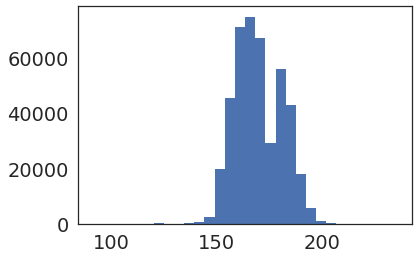

In [41]:
plt.hist(height.dropna(), bins=30)

In [42]:
brfss[height<120]

/home/downey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,AGE
297729,1.0,105.0,54.43,3.0,4307.570360,3.0,34.0
350597,2.0,105.0,63.50,NaN,158.108332,7.0,54.0
112220,2.0,105.0,77.11,4.0,2780.869330,4.0,35.0
386945,2.0,105.0,48.99,2.0,6249.133540,12.0,75.0
387626,1.0,105.0,92.53,1.0,2414.191940,9.0,60.0
384728,2.0,110.0,63.50,5.0,1363.372400,1.0,24.0
295218,2.0,104.0,79.38,1.0,1798.243170,3.0,31.0
384489,2.0,94.0,70.76,5.0,1247.899020,10.0,66.0
297729,1.0,105.0,54.43,3.0,4307.570360,3.0,33.0
385478,2.0,91.0,49.90,1.0,3177.585440,1.0,21.0


In [43]:
income = brfss['INCOME2']
income.value_counts().sort_index()

1.0     5067
2.0     4377
3.0     6414
4.0     7650
5.0     8694
6.0    10914
7.0    12219
8.0    28112
Name: INCOME2, dtype: int64

In [44]:
class Pmf(pd.Series):
    
    def __init__(self, seq, name='Pmf', normalize=True):
        series = pd.Series(seq).value_counts().sort_index()
        super().__init__(series, name=name)
        if normalize:
            self.normalize()

    @property
    def qs(self):
        return self.index

    @property
    def ps(self):
        return self.values

    def __call__(self, qs):
        return self.get(qs, 0)

    def normalize(self):
        self /= self.sum()

    def bar(self, **options):
        plt.bar(self.index, self.values, label=self.name, **options)

    def plot(self, **options):
        plt.plot(self.index, self.values, label=self.name, **options)


In [45]:
pmf_income = Pmf(income, name='income', normalize=False)
pmf_income

1.0     5067
2.0     4377
3.0     6414
4.0     7650
5.0     8694
6.0    10914
7.0    12219
8.0    28112
Name: income, dtype: int64

In [46]:
pmf_income.qs

Float64Index([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0], dtype='float64')

In [47]:
pmf_income.ps

array([ 5067,  4377,  6414,  7650,  8694, 10914, 12219, 28112])

In [48]:
pmf_income(1)

5067

In [49]:
pmf_income(9)

0

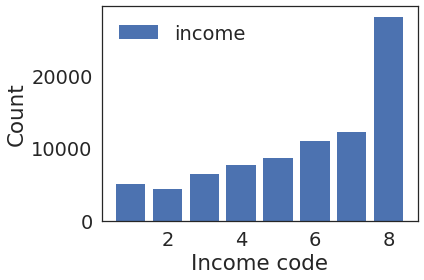

In [50]:
pmf_income.bar()
decorate(xlabel='Income code', ylabel='Count')

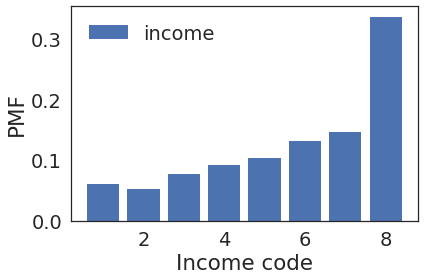

In [51]:
pmf_income.normalize()
pmf_income.bar()
decorate(xlabel='Income code', ylabel='PMF')

In [52]:
pmf_income(8)

0.3368844895562453

In [53]:
age = brfss['AGE']
pmf_age = Pmf(age, name='age')

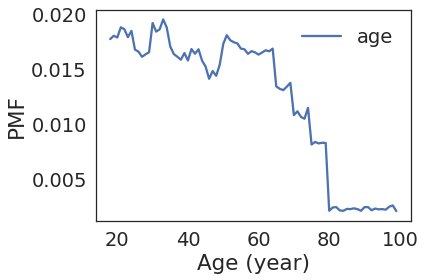

In [54]:
pmf_age.plot()
decorate(xlabel='Age (year)', ylabel='PMF')

In [55]:
height = brfss['HTM4']
pmf_height = Pmf(height, name='height')

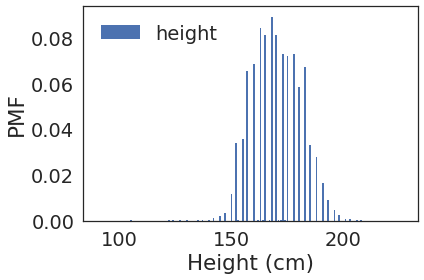

In [56]:
pmf_height.bar()
decorate(xlabel='Height (cm)', ylabel='PMF')

In [57]:
for h in range(180, 190):
    print(h, pmf_height(h) * 100)

180 5.839630871425118
181 0.0010510494728986895
182 0.007357346310290826
183 6.72041032971422
184 0.002102098945797379
185 3.2908358996457965
186 0
187 0
188 2.7894853010731215
189 0


In [58]:
weight = brfss['WTKG3']
pmf_weight = Pmf(weight, name='weight')

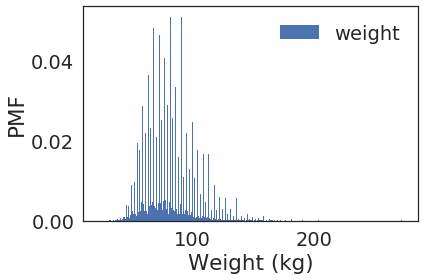

In [59]:
pmf_weight.bar()
decorate(xlabel='Weight (kg)', ylabel='PMF')

In [60]:
def underride(d, **options):
    """Add key-value pairs to d only if key is not in d.

    d: dictionary
    options: keyword args to add to d
    """
    for key, val in options.items():
        d.setdefault(key, val)

    return d


In [96]:
from scipy.interpolate import interp1d

class Cdf(pd.Series):

    def __init__(self, seq, name='Cdf'):
        pmf = Pmf(seq)
        super().__init__(pmf.cumsum(), name=name)

    @property
    def qs(self):
        return self.index

    @property
    def ps(self):
        return self.values

    @property
    def forward(self):
        return interp1d(self.qs, self.ps,
                        kind='previous',
                        assume_sorted=True,
                        bounds_error=False,
                        fill_value=(0,1))

    @property
    def inverse(self):
        return interp1d(self.ps, self.qs,
                        kind='next',
                        assume_sorted=True,
                        bounds_error=False,
                        fill_value=(self.qs[0], np.nan))

    def __call__(self, qs):
        return self.forward(qs)

    def percentile_rank(self, qs):
        return self.forward(qs) * 100

    def percentile(self, percentile_ranks):
        return self.inverse(percentile_ranks / 100)

    def step(self, **options):
        underride(options, where='post')
        plt.step(self.index, self.values, label=self.name, **options)

    def plot(self, **options):
        plt.plot(self.index, self.values, label=self.name, **options)


In [108]:
cdf_height = Cdf(height, name='Height')

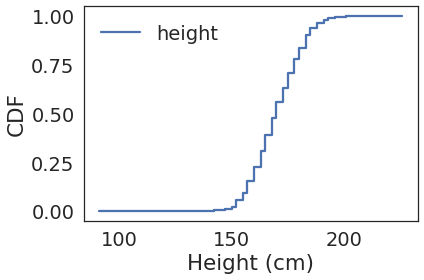

In [107]:
cdf_height.step()
decorate(xlabel='Height (cm)', ylabel='CDF')

In [100]:
cdf_height.forward(160)

array(0.22448315)

In [101]:
cdf_height.inverse(0.5)

array(170.)

In [102]:
female = brfss['SEX'] == 2
male = brfss['SEX'] == 1

In [103]:
height[male].describe()

count    46481.000000
mean       177.538048
std          8.350154
min        103.000000
25%        173.000000
50%        178.000000
75%        183.000000
max        226.000000
Name: HTM4, dtype: float64

In [104]:
height[female].describe()

count    48620.000000
mean       162.968531
std          7.582218
min         91.000000
25%        157.000000
50%        163.000000
75%        168.000000
max        224.000000
Name: HTM4, dtype: float64

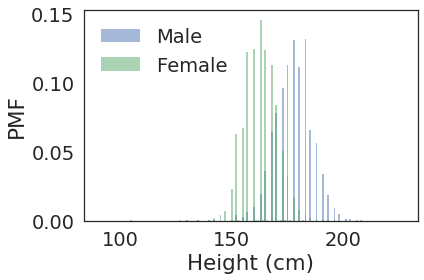

In [105]:
pmf_male_height = Pmf(height[male], name='Male')
pmf_male_height.bar(alpha=0.5)
pmf_female_height = Pmf(height[female], name='Female')
pmf_female_height.bar(alpha=0.5)

decorate(xlabel='Height (cm)', ylabel='PMF')

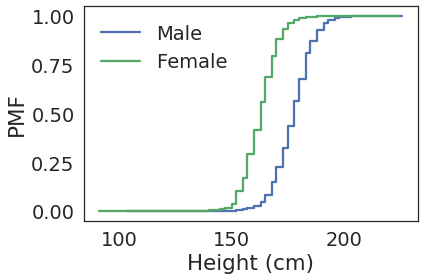

In [106]:
cdf_male_height = Cdf(height[male], name='Male')
cdf_male_height.step()
cdf_female_height = Cdf(height[female], name='Female')
cdf_female_height.step()
decorate(xlabel='Height (cm)', ylabel='PMF')